In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
## Load the dataset
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Preprocess the Data
## Drop Irrelevant Columns
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [4]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
## Encode Categorical Variables
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [6]:
## OneHot Encode 'Geography'
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo  = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(data[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [7]:
geo_encoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [8]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [9]:
geo_encoded_df = pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [10]:
## Combine all the Columns with the original data
data = pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)

In [11]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [12]:
## Save the Encoders and Scaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)
    
with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)

In [13]:
## Divide the dataset into dependent and independent features
X = data.drop('Exited',axis=1)
y = data['Exited']

In [14]:
## Split the data in training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
## Scale the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [17]:
X_test

array([[-5.12501721e-01,  9.09111664e-01, -6.77299309e-01, ...,
        -1.02020406e+00,  1.73668197e+00, -5.63491843e-01],
       [-2.36046598e-01,  9.09111664e-01,  3.84298354e-01, ...,
         9.80196059e-01, -5.75810666e-01, -5.63491843e-01],
       [-4.61306328e-01, -1.09997489e+00,  4.80807232e-01, ...,
        -1.02020406e+00, -5.75810666e-01,  1.77464858e+00],
       ...,
       [ 8.59534812e-01, -1.09997489e+00,  7.70333868e-01, ...,
         9.80196059e-01, -5.75810666e-01, -5.63491843e-01],
       [ 4.70449825e-01,  9.09111664e-01, -9.66825944e-01, ...,
         9.80196059e-01, -5.75810666e-01, -5.63491843e-01],
       [-1.84851205e-01,  9.09111664e-01, -1.73715981e-03, ...,
        -1.02020406e+00,  1.73668197e+00, -5.63491843e-01]])

In [18]:
with open("scaler.pkl",'wb') as file:
    pickle.dump(scaler,file)

In [19]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


# ANN Implementation

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [21]:
!pip install tensorflow==2.19.0 matplotlib==3.7.1 pandas scikit-learn numpy


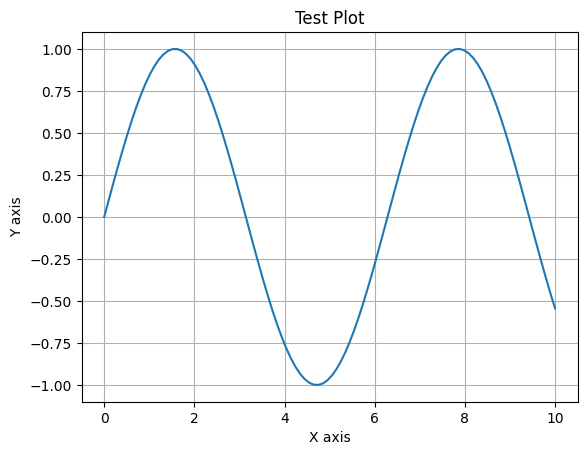

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Test Plot")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(True)
plt.show()


In [23]:
(X_train.shape[1],)

(12,)

In [24]:
## Build our ANN Model
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),  ## HL1 Connected with input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1,'sigmoid')  ## Output Layer
]
)

c:\Users\ajits\OneDrive\Desktop\PROJECTS\Udemy\ANN CLASSIFICATION\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

loss = tensorflow.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x0000018BAF51F880>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [28]:
# complie the model
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [30]:
## Set up Early Stopping
early_stopping_callback = EarlyStopping(monitor = 'val_loss',patience=10,restore_best_weights=True)


In [31]:
## TRAIN THE MODEL
history = model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks = [tensorflow_callback,early_stopping_callback]
) 

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8081 - loss: 0.4495 - val_accuracy: 0.8500 - val_loss: 0.3519
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8532 - loss: 0.3618 - val_accuracy: 0.8570 - val_loss: 0.3455
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8530 - loss: 0.3510 - val_accuracy: 0.8590 - val_loss: 0.3477
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8589 - loss: 0.3465 - val_accuracy: 0.8560 - val_loss: 0.3570
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8648 - loss: 0.3287 - val_accuracy: 0.8580 - val_loss: 0.3395
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8612 - loss: 0.3355 - val_accuracy: 0.8595 - val_loss: 0.3458
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8568 - loss: 0.3388 - val_accuracy: 0.8645 - val_loss: 0.3371
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8655 - loss: 0.3316 - val_accu

In [32]:
model.save('model.h5')

In [33]:
## Load Tenserboard Extension
%load_ext tensorboard

In [39]:
%tensorboard --logdir logs/fit/20250630-160435

Reusing TensorBoard on port 6006 (pid 14972), started 0:00:11 ago. (Use '!kill 14972' to kill it.)